# Дискретные случайные процессы и временные ряды.
## Задание 3.2
### Гауссовские процессы. Винеровские процессы.

Выполненную работу нужно отправить телеграм-боту  `@miptstats_ad21_bot`
* Дедлайн см. в телеграм-боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* По практическим задачам прислать нужно ноутбук.
* Теоретические задачи необходимо оформить в tex’е и прислать `pdf` или же прислать фотку в правильной ориентации рукописного решения, где все четко видно.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Не забывайте делать пояснения и выводы.
* При проверке могут быть запущены функции, которые отвечают за генерацию траекторий винеровского процесса.

------------------

### Задача 1 (3 балла)

Пусть $(W_t,t\geqslant 0)$ --- винеровский процесс. Докажите, что следующие процессы тоже винеровские:

а) $X_t=-W_t;$

б) $X_t = \sqrt{c} \; W_{t/c}, c > 0$

в) $X_t=W_t \, I\{t < T\}+(2W_T-W_t)I\{t \geqslant T\}$.



### Задача 2 (2 балла)

Пусть $(Y_t,t\in [0,1] )$ --- гауссовский процесс с нулевой функцией среднего и ковариационной функцией $r(s,t)=\min(s,t)-st$. Докажите, что такой процесс существует и что процесс $(X_t=(t+1)Y_{t/(t+1)}\;,\,t\geqslant 0)$ является винеровским.

### Задача 3 (1 балл)

Докажите, что существует гауссовский процесс $X=(X_t,t\in{\mathbb R}_{+}^d)$ с нулевой функцией среднего и ковариационной функцией

$$ R(s,t)=\prod_{k=1}^d\min(s_k,t_k), $$

где $s=(s_1,\ldots,s_d)\in {\mathbb R}_{+}^d$, $t=(t_1,\ldots,t_d)\in {\mathbb R}_{+}^d$.

### Задача 4. Генерации процессов (7 баллов)

**1. Генерация винеровского процесса**

Рассмотрим еще один способ генерации винеровского процесса, основанный на независимых приращениях.

$W_t - W_u \sim \mathcal{N}(0, t-u),\\ \forall t > u > s: (W_t - W_u) \perp\!\!\!\perp (W_u - W_s)$

Тогда мы можем последовательно генерировать траекторию процесса для моментов времени $t_1, \dots, t_n$.

Сгенерируйте траекторию винеровского процесса на отрезке, поделив его на равные моменты времени, и постройте ее график. Сгенерируйте еще одну траекторию и постройте график двумерного винеровского процесса. Графики должны быть похожими на графики с семинара.

Вспомним факт, что если случайные величины $X_1, \ldots, X_n$ независимы и имеют распределения $\mathcal{N}(a_i, \sigma^2_i), i = 1, \ldots, n,$ то $S_n = \sum\limits_{i = 1}^{n}X_i$ имеет распределение $\mathcal{N}(\sum\limits_{i = 1}^{n}a_i, \sum\limits_{i = 1}^{n}\sigma^2_i).$ Тогда можно разделить отрезок $[0, \tau]$ на $n$ равных частей, сгенерировать $n$ случайных величин из $\mathcal{N}(0, \tau / n),$ и сумма этих случайных величин до какого-то времени $t$ и будет испомым винеровским процессом.

In [250]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from matplotlib.colors import ListedColormap
import plotly.graph_objs as go
from tqdm import tqdm

In [251]:
def build_1d_winer(n, tau):
    delta = tau / n
    growths = sps.norm(loc=0, scale=np.sqrt(delta)).rvs(size=n)
    w = np.concatenate(([0], np.cumsum(growths)))
    return w

In [252]:
def visualize_1d_winer(w, tau):
    n = len(w) - 1
    plt.figure(figsize=(15, 10))
    plt.plot(np.linspace(0, tau, n + 1), w)
    plt.grid(ls=':')
    plt.xticks(fontsize=20)
    plt.xlabel('$t$', fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('$W_t$', fontsize=20)
    plt.title(label='Одномерный винеровский процесс', fontsize=20)
    plt.show()

In [253]:
def visualize_2d_winer(w, w_2, from_color=[138, 43, 26], to_color=[0, 250, 154]):
    plt.figure(figsize=(15, 10))
    c = np.linspace(0, 1, len(w))
    plt.scatter(w, w_2, c=c)
    plt.grid(ls=':')
    plt.legend('Двумерный винеровский процесс')
    plt.xticks(fontsize=20)
    plt.xlabel('$W_1(t)$', fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('$W_2(t)$', fontsize=20)
    plt.title(label='Двумерный винеровский процесс', fontsize=20)
    plt.colorbar(label='Цвет в зависимости от времени')
    plt.show()

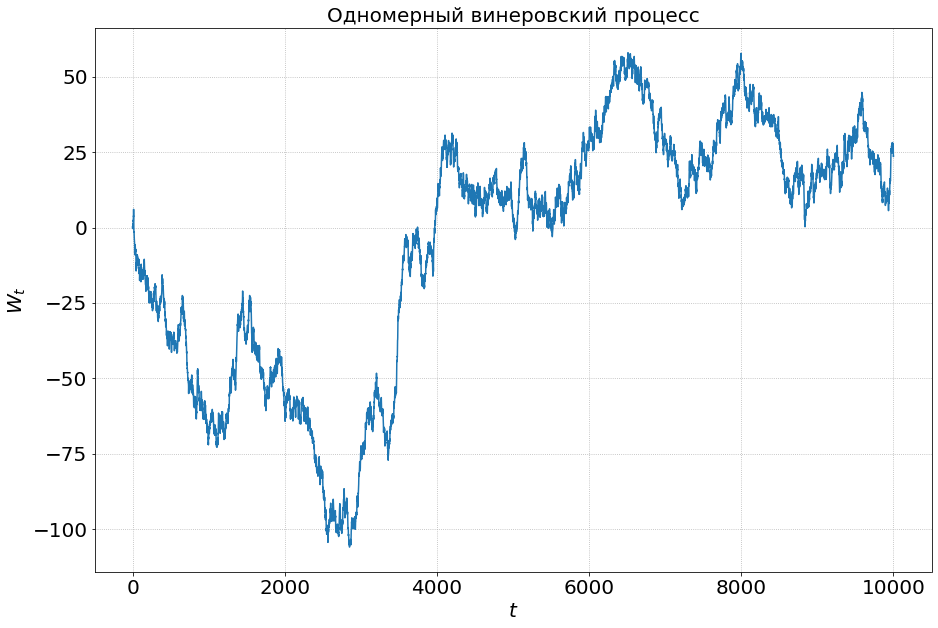

In [254]:
n = 10000
tau = 10000
w = build_1d_winer(n, tau)
visualize_1d_winer(w, tau)

Заметил такую неприятную проблему: ни в `matplotlib`, ни в `plotly` нельзя передавать массив цветов в параметры линии. В параметры точки массив цветов передается, поэтому график изображен в виде точек.

In [255]:
w_2 = build_1d_winer(n, tau)

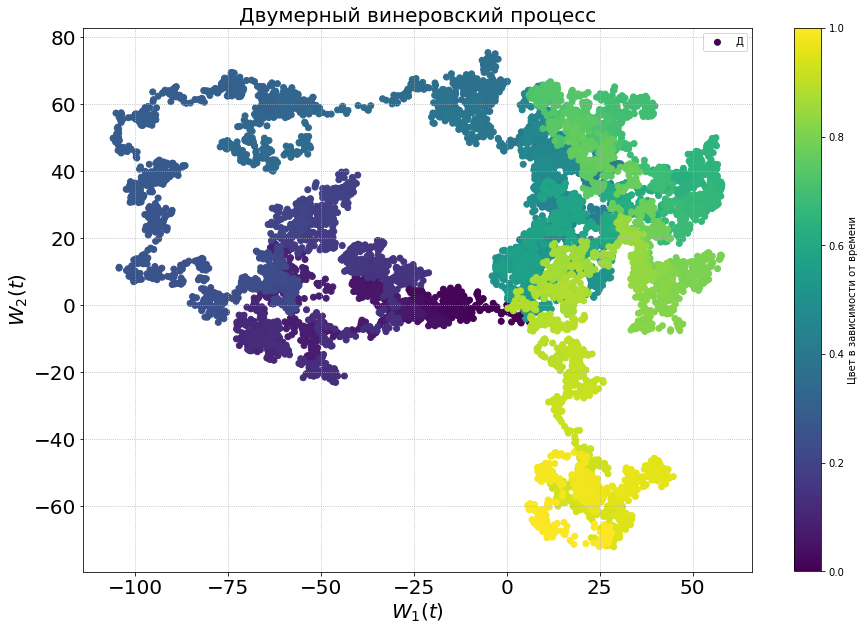

In [256]:
visualize_2d_winer(w, w_2)

**2. Генерация гауссовского процесса**

Как мы знаем для любых моментов времени $(X_{t_1}, \dots, X_{t_n})$ - гауссовский вектор. Воспользуйтесь этим и сгенерируйте гауссовский процесс $Y_t$ из задачи 2 на временной сетке.

Аналогично пункту 1 сгенерируйте траекторию $Y_t$ и постройте ее график. 

$X_t = (t + 1)Y_{t/(t + 1)},$ тогда $Y_{t / (t + 1)} = \frac{X_t}{t + 1}.$

In [257]:
n = 10000
tau = 100
w = build_1d_winer(n, tau)
t = np.linspace(0, tau, n + 1)
y = w / (1 + t)
t_y = t / (1 + t)

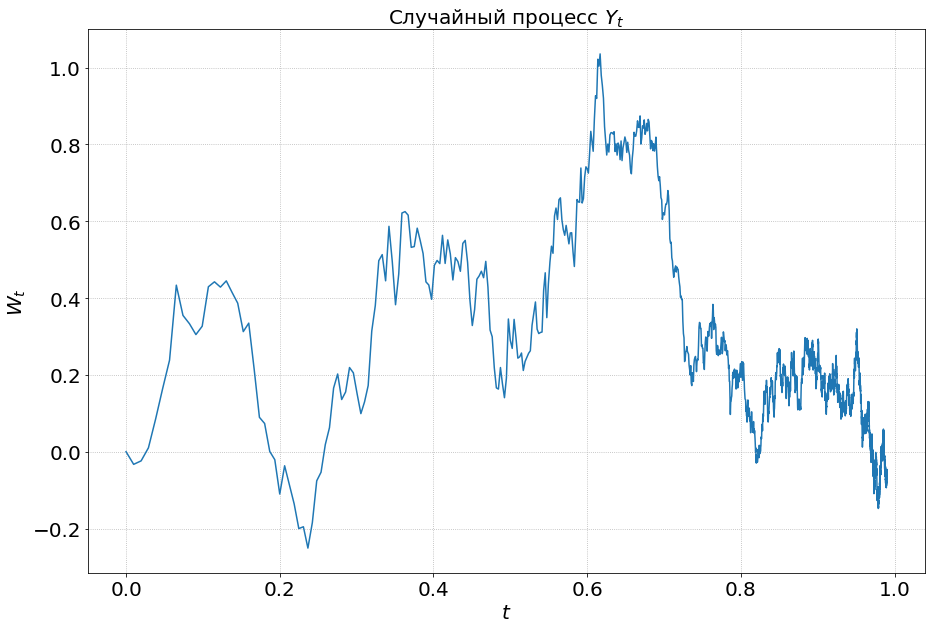

In [258]:
plt.figure(figsize=(15, 10))
plt.plot(t_y, y)
plt.grid(ls=':')
plt.xticks(fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('$W_t$', fontsize=20)
plt.title(label='Случайный процесс $Y_t$', fontsize=20)
plt.show()

**3. Гауссово поле**

Похожим образом сгенерируйте двумерное гауссово поле $X=(X_t,t\in{\mathbb R}_{+}^2)$ с нулевой функцией среднего и ковариационной функцией

$$ R(s,t)=\min(s_1,t_1) \min(s_2,t_2)$$

Рассмотрим два момента времени: $(u_1, u_2)$ и $(t_1, t_2),$ причем пусть $u_1 \leq t_1, u_2 \leq t_2.$ Тогда $$DX_t = cov(X_t, X_t) = cov(X_t - X_u + X_u, X_t - X_u + X_u) = D(X_t - X_u) + 2cov(X_t - X_u, X_u) +  = [X_t - X_u, X_u -\text{независимые приращения}] = D(X_t - X_u) + DX_u, \Rightarrow D(X_t - X_u) = DX_t - DX_u = t_1 t_2 - u_1 u_2.$$ Тогда случайная величина X_{(t_1, t_2)}

Пусть у нас время бежит от $(0, 0)$ до $(\tau_1, \tau_2).$ Разобьем поле на $n_1 n_2$ частей (неформально разобьем двумерное время на прямоугольники размера $\Delta_1 \times \Delta_2, \Delta_i = \frac{\tau_i}{n_i}, i = 1, 2$). Сгенерируем $n_1 n_2$ нормальных случайных величин с нулевым средним и дисперсией $\Delta_1 \Delta_2,$ запишем их в матрицу $n_1 \times n_2$ и последовательно кумулятивно просуммируем по осям. Тогда $\forall i = 1, \ldots, n_1, j = 1, \ldots, n_2$ случайная величина $X_{(i \Delta_1, j \Delta_2)}$ будет суммой случайных величин, находящихся слева и сверху в матрице от нее. Таких величин $i \cdot j,$ они независимы и распределены как $\mathcal{N}(0, Delta_1 Delta_2),$ поэтому $X_{(i \Delta_1, j \Delta_2)} \sim \mathcal{N}(0, i \Delta_1 \cdot j \Delta_2),$ что мы и хотели.

In [259]:
n_1 = 100
n_2 = 100
tau_1 = 100
tau_2 = 100

delta_1 = tau_1 / n_1
delta_2 = tau_2 / n_2

X = np.linspace(delta_1, tau_1, n_1).reshape((1, n_1))
Y = np.linspace(delta_2, tau_2, n_2).reshape((n_2, 1))

In [260]:
growths = sps.norm(loc=0, scale=np.sqrt(delta_1 * delta_2)).rvs(size=(n_1, n_2))
z = np.cumsum(np.cumsum(growths, axis=0), axis=1)
z

array([[-7.55260280e-02,  2.09254467e+00,  8.05355318e-01, ...,
         9.38326555e+00,  8.05069665e+00,  7.96754088e+00],
       [-1.00372623e-01,  1.87712752e+00, -9.13724623e-01, ...,
         1.06579552e+01,  9.19413621e+00,  8.70472897e+00],
       [ 8.15376871e-01,  2.85426649e+00, -1.54319181e-03, ...,
         5.96757283e+00,  4.89561092e+00,  3.74208417e+00],
       ...,
       [ 3.82145070e-01, -4.29569832e+00, -1.77207042e+01, ...,
         1.61031429e+02,  1.44444963e+02,  1.39635742e+02],
       [-6.19723952e-01, -6.32490751e+00, -1.84595278e+01, ...,
         1.57274528e+02,  1.39907128e+02,  1.36048537e+02],
       [-2.26862221e+00, -8.23026563e+00, -1.93185053e+01, ...,
         1.45370902e+02,  1.29399994e+02,  1.26473845e+02]])

In [261]:
x_0 = np.array([[0, n_1], [0, n_1]])
y_0 = np.array([[0, 0], [n_2, n_2]])
z_0 = np.array([[0, 0], [0, 0]])

Text(0.5, 0.92, 'Гауссовский процесс $X(t_1, t_2)$')

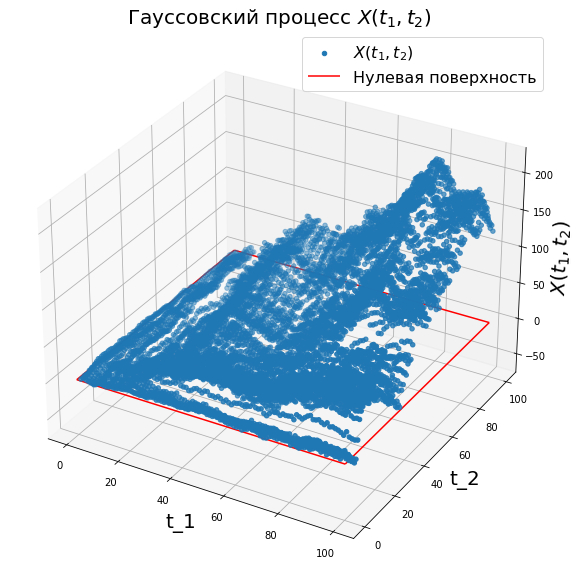

In [262]:
x, y = np.meshgrid(X, Y)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.reshape(-1), y.reshape(-1), z.reshape(-1), label='$X(t_1, t_2)$')
ax.legend(fontsize=16)
ax.plot_wireframe(x_0, y_0, z_0, color='r', label='Нулевая поверхность')
ax.legend(fontsize=16)
plt.xlabel('t_1', fontsize=20)
plt.ylabel('t_2', fontsize=20)
ax.set_zlabel('$X(t_1, t_2)$', fontsize=20)
plt.title(label='Гауссовский процесс $X(t_1, t_2)$', fontsize=20)



**4. Догенерация винеровского процесса на отрезке [$t_1$, $t_3$]**

Пусть мы зафиксировали моменты времени $t_1 < t_2 < t_3$. Рассмотрите условное распределение $(W_{t_2} - W_{t_1}\; |\; W_{t_3} - W_{t_1}).$ Рассчитайте его теоретически и, используя его, перегенерируйте винеровский процесс на каком-то отрезке, сравните полученные графики. 

_Смысл: мы знаем смещение на каком-то отрезке времени, тогда мы можем оценить смещение в какой-то промежуточной точке этого отрезка, например, середине._

Рассчитаем плотность такого условного распределения (назовем его Z, будем винеровский процесс обозначать маленькой буквой $w$, а не большой $W$): 
$$p_{w_{t_2} - w_{t_1} | w_{t_3} - w_{t_1}}(x | y) = \frac{p_{(w_{t_2} - w_{t_1}, w_{t_3} - w_{t_1})}(x, y)}{p_{w_{t_3} - w_{t_1}}(y)} = \frac{p_{(w_{t_2} - w_{t_1}, w_{t_3} - w_{t_2})}(x, y - x)}{p_{w_{t_3} - w_{t_1}}(y)} = \frac{p_{w_{t_2} - w_{t_1}}(x) p_{w_{t_3} - w_{t_2}}(y - x)}{p_{w_{t_3} - w_{t_1}}(y)} = \frac{\frac{e^{-\frac{(y - x)^2}{2(t_3 - t_2)}}}{\sqrt{2 \pi(t_3 - t_2)}}\frac{e^{-\frac{x^2}{2(t_2 - t_1)}}}{\sqrt{2 \pi(t_2 - t_1)}}}{\frac{e^{-\frac{y^2}{2(t_3 - t_1)}}}{\sqrt{2 \pi(t_3 - t_1)}}} = \\ = \frac{e^{-\frac{x^2((t_3 - t_2)(t_3 - t_1) + (t_2 - t_1)(t_3 - t_1))}{2(t_2 - t_1)(t_3 - t_2)(t_3 - t_1)} -\frac{y^2((t_2 - t_1)(t_3 - t_1) - (t_2 - t_1)(t_3 - t_2))}{2(t_2 - t_1)(t_3 - t_2)(t_3 - t_1)} + \frac{xy(t_2 - t_1)(t_3 - t_1)}{(t_2 - t_1)(t_3 - t_2)(t_3 - t_1)}}}{\sqrt{2 \pi{\frac{(t_2 - t_1)(t_3 - t_2)}{t_3 - t_1}}}} = \frac{e^{-\frac{x^2(t_3 - t_1)(t_3 - t_1)}{2(t_2 - t_1)(t_3 - t_2)(t_3 - t_1)} -\frac{y^2(t_2 - t_1)(t_2 - t_1)}{2(t_2 - t_1)(t_3 - t_2)(t_3 - t_1)} + \frac{xy(t_2 - t_1)(t_3 - t_1)}{(t_2 - t_1)(t_3 - t_2)(t_3 - t_1)}}}{\sqrt{2 \pi{\frac{(t_2 - t_1)(t_3 - t_2)}{t_3 - t_1}}}} = \\ = \frac{e^{-\frac{\left(x - \frac{y(t_2 - t_1)}{t_3 - t_1}\right)^2}{2\frac{(t_2 - t_1)(t_3 - t_2)}{t_3 - t_1}}}}{\sqrt{2 \pi \frac{(t_2 - t_1)(t_3 - t_2)}{t_3 - t_1}}} = p_{\mathcal{N}(\frac{y(t_2 - t_1)}{t_3 - t_1}, \frac{(t_2 - t_1)(t_3 - t_2)}{t_2 - t_1})}(x).$$

Пусть у нас $t_1 = 0, t_3 = \tau.$ Побьем отрезок $[0, \tau]$ на $n$ равных частей и сгенерируем $n - 1$ случайную величину, отвечающим приращениям $Z_{i\tau/n} - Z_{(i - 1)\tau/n}, i = 1, \ldots, n - 1.$ Заметим, что максимальная дисперсия достигается у случайной величины под номером $n / 2,$ поэтому будем генерировать в положительном направлении времени $n / 2$ случайных величин, отвечающих приращениям при $i <= n/2$ и еще $n / 2 - 1$ случайную величину будем генерировать в отрицательном направлении времени (с $\tau$ до $\tau/2$). Первые будут из распределения $\mathcal{N}\left(\frac{y}{n}, \frac{\tau\left(1 - \frac{2i - 1}{n}\right)}{n}\right),$ а вторые &mdash; из распределения $\mathcal{N}\left(-\frac{y}{n}, \frac{\tau\left(1 - \frac{2i - 1}{n}\right)}{n}\right).$

In [263]:
tau = 10000
n = 10000

w = build_1d_winer(n, tau)
y = w[-1]
w

array([  0.        ,   1.23847091,   1.16570602, ..., -52.41507525,
       -53.08310176, -53.18210712])

In [264]:
w_reg_1 = [0]
it_1 = np.linspace(1, int(n / 2), int(n / 2))
for i in tqdm(it_1):
    growth = sps.norm(loc=y / n, scale=np.sqrt((tau * (1 - (2 * i - 1) / n) / n))).rvs(size=1)[0]
    w_reg_1.append(growth)
    
w_reg_1 = np.cumsum(w_reg_1)

it_2 = np.linspace(1, int(n / 2 - 1), int(n / 2 - 1))
w_reg_2 = [y]
for i in tqdm(it_2):
    growth = sps.norm(loc=-y / n, scale=np.sqrt((tau * (1 - (2 * i - 1) / n) / n))).rvs(size=1)[0]
    w_reg_2.append(growth)
    
w_reg_2 = np.cumsum(w_reg_2)

w_reg = np.concatenate((w_reg_1, np.flip(w_reg_2)))
w_reg

100%|██████████| 4999/4999 [00:03<00:00, 1321.36it/s]


array([ 0.00000000e+00, -5.29351423e-02,  3.72084013e-01, ...,
       -5.02151105e+01, -5.18100763e+01, -5.31821071e+01])

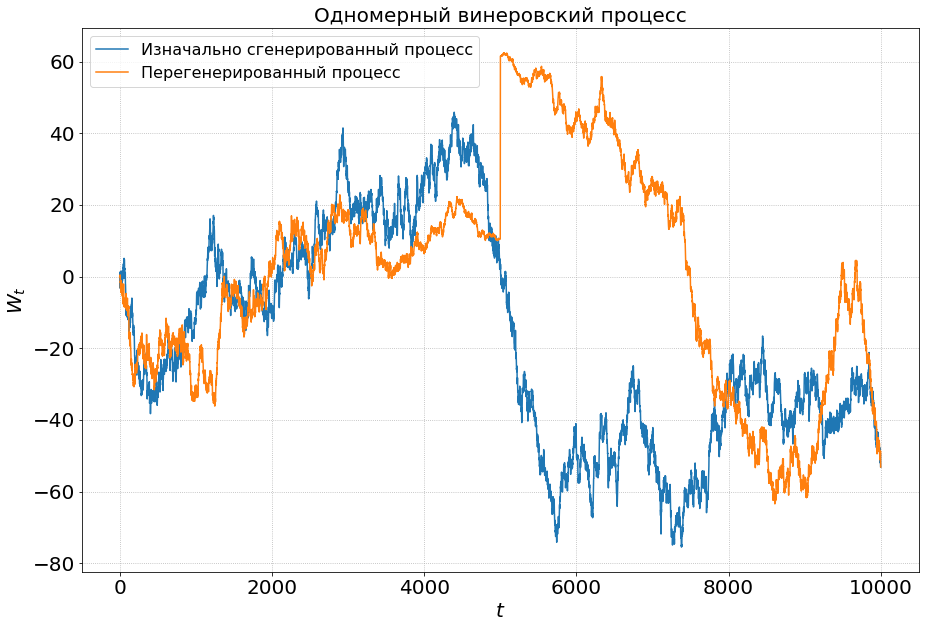

In [265]:
plt.figure(figsize=(15, 10))
plt.plot(np.linspace(0, tau, n + 1), w, label='Изначально сгенерированный процесс')
plt.plot(np.linspace(0, tau, n + 1), w_reg, label='Перегенерированный процесс')
plt.grid(ls=':')
plt.xticks(fontsize=20)
plt.xlabel('$t$', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('$W_t$', fontsize=20)
plt.title(label='Одномерный винеровский процесс', fontsize=20)
plt.legend(fontsize=16)
plt.show()

**Вывод:** в первой части мы сгенерировали одномерный и двумерный винеровские процессы с использованием определения. В результате действительно получились процессы, похожие на винеровские. Во второй части мы сгенерировали гауссовский процесс с помощью винеровского. Стоит заметить, что модуль случайной величины, соответствующей процессу, редко становится больше 1. В третьем пункте мы сгенерировали гауссово поле с нулевоц функцией среднего и данной ковариационной функцией. Можно отметить, что, например, модуль отклонения в гауссовом поле при $t = (t_0, t_0)$ больше, чем модуль отклонения в винеровском процессе с $t = t_0.$ Наконец, в последнем пункте мы перегенерировали процесс. Фактически, имея фиксированные начало и конец, нам надо было оценить смещение в промежуточных точках, что получилось сделать довольно неплохо.